In [1]:
load('../temp.rda')

In [2]:
library(data.table)

In [3]:
ls()

[1] "key.match"     "noncore.match"

In [4]:
nrow(key.match)

[1] 573

In [5]:
length(unique(key.match$q))

[1] 481

In [6]:
#bad <- key.match[type == 'A*01:04N']
#good <- key.match[type == 'A*01:01']
wrong <- c('C*04:09N', 'C*04:01')
good1 <- key.match[type == wrong[1]]
bad1 <- key.match[type == wrong[2]]
rest1 <- key.match[!type %in% wrong]
good2 <- noncore.match[type == wrong[1]]
bad2 <- noncore.match[type == wrong[2]]
rest2 <- noncore.match[!type %in% wrong]
rest <- rbind(rest1, rest2)

In [7]:
sort(table(rest[q %in% c(good1$q, bad1$q), type]))

C*07:01 
      4

In [8]:
sort(table(rest[q %in% c(good2$q, bad2$q), type]))

C*07:01 
     35

In [9]:
table(bad1$EXON)


E2 E3 
27 30 

In [10]:
table(good1$EXON)


E2 E3 
27 28 

In [11]:
table(bad2$EXON)
table(good2$EXON)


E1 E4 E5 E6 
 6 18 14 35 


E1 E4 E5 E6 E7 
 6 18 14 36  7 

In [12]:
good <- good2[EXON == 'E6'][order(ts), .(ts, te, q)]

In [13]:
bad <- bad2[EXON == 'E6'][order(ts), .(ts, te, q)]

In [15]:
library(IRanges)

In [16]:
ir.good <- IRanges(good$ts, good$te, names = good$q)
good.col <- ifelse(names(ir.good) %in% rest$q, 'gray50', 'black')

In [17]:
ir.good

IRanges of length 36
     start end width                      names
[1]      1  10    10  H5HVHCCXX:1:11:816456:0/1
[2]      1  10    10  H5HVHCCXX:1:11:817538:0/1
[3]      1  10    10 H5HVHCCXX:1:14:1758889:0/1
[4]      1  10    10  H5HVHCCXX:1:7:4878781:0/1
[5]      1  10    10  H5HVHCCXX:2:11:435082:0/2
...    ... ...   ...                        ...
[32]     1  10    10 H5HVHCCXX:7:16:1505808:0/2
[33]     1  10    10  H5HVHCCXX:7:6:2186237:0/2
[34]     1  10    10   H5HVHCCXX:7:9:568495:0/1
[35]     1  10    10   H5HVHCCXX:7:9:904758:0/1
[36]     1  10    10 H5HVHCCXX:8:15:3422617:0/1

In [18]:
ir.bad <- IRanges(bad$ts, bad$te, names = bad$q)
bad.col <- ifelse(names(ir.bad) %in% rest$q, 'gray50', 'black')

In [19]:
plotRanges <- function(x, xlim = x, main = deparse(substitute(x)), col = "black", sep = 0.5, ...)
 {
 height <- 1
 if (is(xlim, "Ranges"))
 xlim <- c(0, max(end(xlim)))
 bins <- disjointBins(IRanges(start(x), end(x) + 1))
 plot.new()
 plot.window(xlim, c(0, max(bins)*(height + sep)))
 ybottom <- bins * (sep + height) - height
 rect(start(x)-0.5, ybottom, end(x)+0.5, ybottom + height, col = col, ...)
 title(main)
 axis(1)
 }

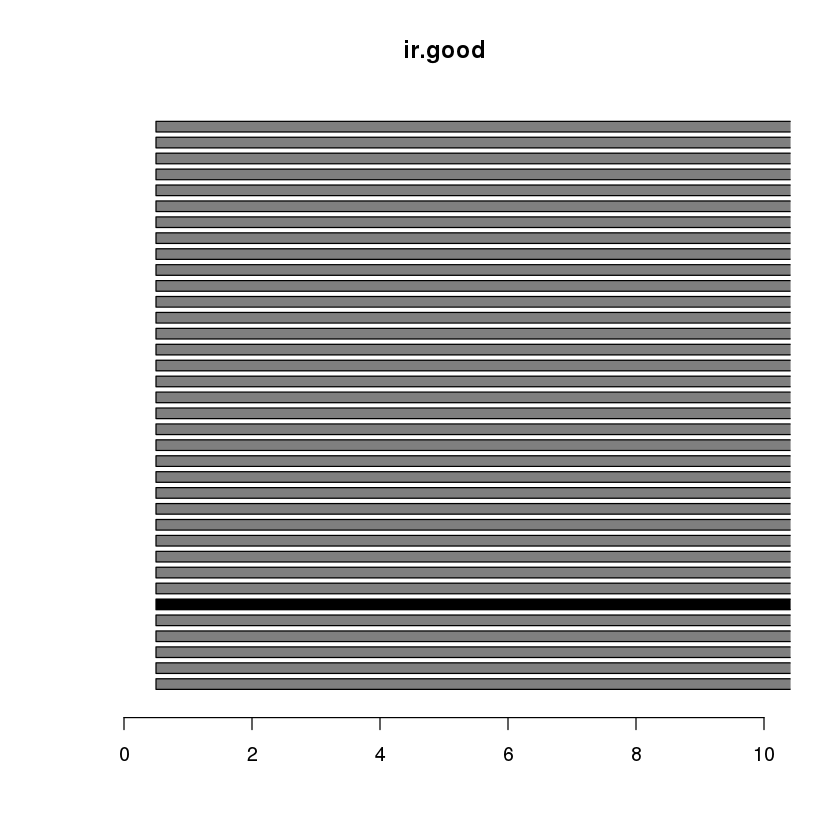

In [20]:
plotRanges(ir.good, col = good.col)

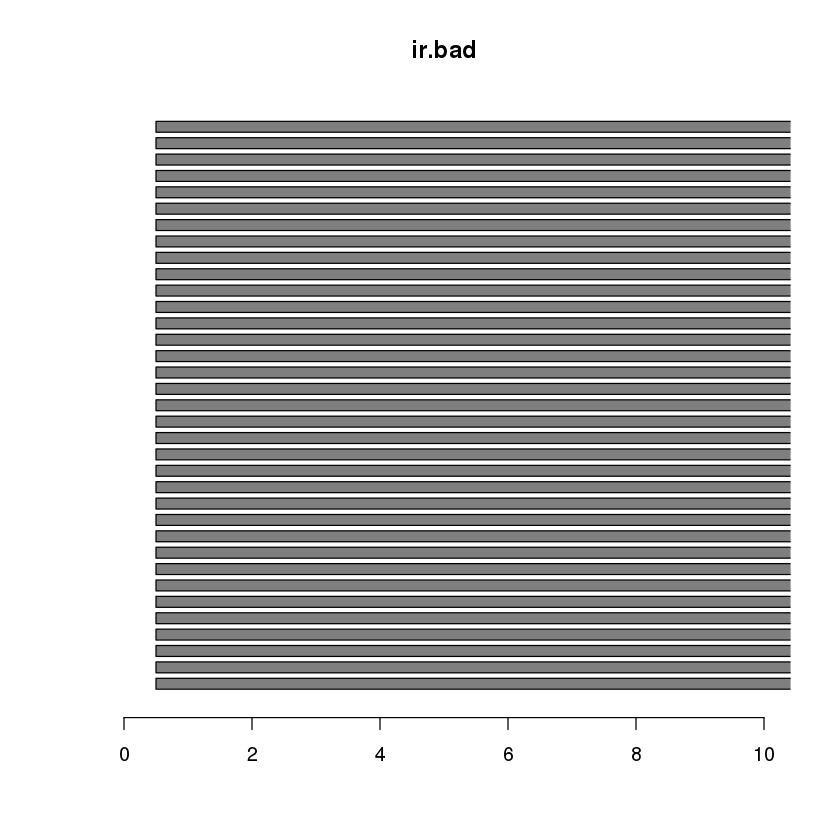

In [21]:
plotRanges(ir.bad, col = bad.col)

In [22]:
save(good, bad, plotRanges, ir.good, ir.bad, good.col, bad.col, file = 'wrong/wrong.187522124-2.rda')

In [23]:
pdf('wrong/wrong.187522124-2.good.pdf')
plotRanges(ir.good, col = good.col)
dev.off()
pdf('wrong/wrong.187522124-2.bad.pdf')
plotRanges(ir.bad, col = bad.col)
dev.off()

pdf 
  2

pdf 
  2

In [35]:
exons

ERROR: Error in rbindlist(l, use.names, fill, idcol): Item 2 of list input is not a data.frame, data.table or list


               V2 E1 E2 E3 E4 E5 E6 E7 E8
    1:    A*01:01  1  1  1  1  1  1  1  0
    2:   A*01:01L  1  1  1  1  1  1  1  0
    3:   A*01:01N  1  1  1  1  1  1  1  0
    4:    A*01:02  1  1  1  1  1  1  1  0
    5:    A*01:03  1  1  1  1  1  1  1  0
   ---                                   
10226: DRB5*02:06  0  1  1  0  0  0  0  0
10227: DRB6*02:01  0  1  1  1  0  0  0  0
10228: DRB7*01:01  1  1  1  1  0  0  0  0
10229: DRB8*01:01  0  0  1  1  0  0  0  0
10230: DRB9*01:01  0  1  0  0  0  0  0  0

In [39]:
colSums(data.frame(exons)[,-1])

E1    E2    E3    E4    E5    E6    E7    E8 
 1636 10256  8219  2997  1389   979   904     1

In [40]:
en <- exons$V2
tt <- exons[, V2:=NULL]

In [43]:
es <- grep('^A', en)
print(length(es))
colSums(exons[es])

[1] 2467


E1   E2   E3   E4   E5   E6   E7   E8 
 404 2467 2470  898  427  265  265    0

In [44]:
es <- grep('^B', en)
print(length(es))
colSums(exons[es])

[1] 3138


E1   E2   E3   E4   E5   E6   E7   E8 
 650 3139 3142 1146  601  374  366    0

In [45]:
es <- grep('^C', en)
print(length(es))
colSums(exons[es])

[1] 2078


E1   E2   E3   E4   E5   E6   E7   E8 
 375 2082 2082  663  361  340  273    1

In [46]:
es <- grep('^DRB1', en)
print(length(es))
colSums(exons[es])

[1] 1361


E1   E2   E3   E4   E5   E6   E7   E8 
 113 1376  194  142    0    0    0    0

In [47]:
es <- grep('^DQB1', en)
print(length(es))
colSums(exons[es])

[1] 615


E1  E2  E3  E4  E5  E6  E7  E8 
 54 617 225  83   0   0   0   0

In [48]:
es <- grep('^DPB1', en)
print(length(es))
colSums(exons[es])

[1] 488


E1  E2  E3  E4  E5  E6  E7  E8 
 30 492  71  49   0   0   0   0

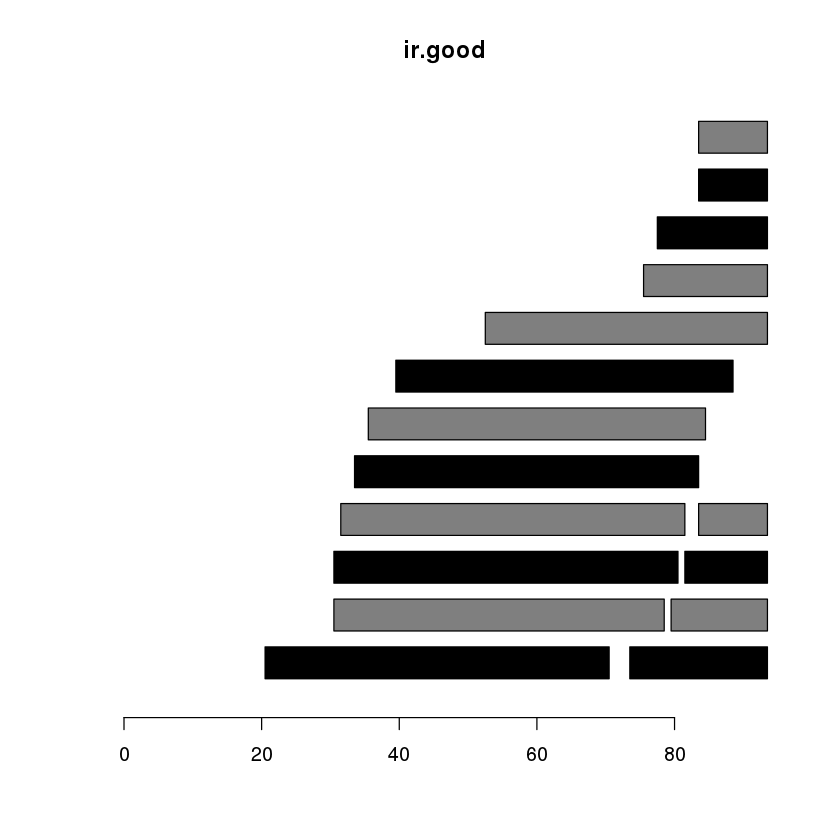

In [91]:
plotRanges2 <- function(x, xlim = x, main = deparse(substitute(x)), col = "black", sep = 0.5, ...)
 {
 height <- 1
 if (is(xlim, "Ranges"))
 xlim <- c(0, max(end(xlim)))
 bins <- disjointBins(IRanges(start(x), end(x) + 1))
 plot.new()
 plot.window(xlim, c(0, max(bins)*(height + sep)))
 ybottom <- bins * (sep + height) - height
 rect(start(x)-0.5, ybottom, end(x)+0.5, ybottom + height, col = col, ...)
 title(main)
 axis(1)
 }
plotRanges2(ir.good, col = rep(c('black', 'gray50'), 8))